# **Methods for making AI systems more transparent and interpretable to facilitate accountancy**

Team members:
Vedashri Marichetty and A Shree Vyshnavi

In [10]:
#install required libraries
pip install numpy pandas matplotlib tensorflow keras shap lime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Load the metadata
metadata_path = '/content/drive/My Drive/summer_internship_ai/Chest_xray_Corona_Metadata.csv'
metadata_df = pd.read_csv(metadata_path)

# Assuming the metadata contains columns 'X_ray_image_name' and 'Label'
metadata_df['filename'] = metadata_df['X_ray_image_name']
metadata_df['class'] = metadata_df['Label'].apply(lambda x: 'normal' if x == 'Normal' else 'infected')

# Paths to your image directories
base_dir = '/content/drive/My Drive/summer_internship_ai/Coronahack-Chest-XRay-Dataset/test'  # Adjust this to the actual base directory of your images

# Add the full path to the filename
metadata_df['filename'] = metadata_df['filename'].apply(lambda x: os.path.join(base_dir, x))

train_df = metadata_df.sample(frac=0.7, random_state=1)
temp_df = metadata_df.drop(train_df.index)
val_df = temp_df.sample(frac=0.5, random_state=1)
test_df = temp_df.drop(val_df.index)

# Check the DataFrames
print(train_df.head())
print("\n\n",val_df.head())
print("\n\n",test_df.head())

      Unnamed: 0               X_ray_image_name     Label Dataset_type  \
4519        4519   person692_bacteria_2589.jpeg  Pnemonia        TRAIN   
3147        3147   person325_bacteria_1500.jpeg  Pnemonia        TRAIN   
3037        3037  person1945_bacteria_4872.jpeg  Pnemonia        TRAIN   
712          712      NORMAL2-IM-0490-0001.jpeg    Normal        TRAIN   
5411        5434      NORMAL2-IM-0288-0001.jpeg    Normal         TEST   

     Label_2_Virus_category Label_1_Virus_category  \
4519                    NaN               bacteria   
3147                    NaN               bacteria   
3037                    NaN               bacteria   
712                     NaN                    NaN   
5411                    NaN                    NaN   

                                               filename     class  
4519  /content/drive/My Drive/summer_internship_ai/C...  infected  
3147  /content/drive/My Drive/summer_internship_ai/C...  infected  
3037  /content/drive/My Dr

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='class',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='filename',
    y_col='class',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='filename',
    y_col='class',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Verify data generators
print(f"Number of training samples: {train_generator.samples}")
print(f"Number of validation samples: {validation_generator.samples}")
print(f"Number of test samples: {test_generator.samples}")


Found 428 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 3709 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Found 88 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 798 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Found 108 validated image filenames belonging to 2 classes.
Number of training samples: 428
Number of validation samples: 88
Number of test samples: 108


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 779 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/10
14/14 [==============================] - 138s 10s/step - loss: 0.9970 - accuracy: 0.5327 - val_loss: 0.6197 - val_accuracy: 0.6591
Epoch 2/10
14/14 [==============================] - 33s 2s/step - loss: 0.5517 - accuracy: 0.7336 - val_loss: 0.2880 - val_accuracy: 0.9432
Epoch 3/10
14/14 [==============================] - 33s 2s/step - loss: 0.2892 - accuracy: 0.8575 - val_loss: 0.1323 - val_accuracy: 0.9545
Epoch 4/10
14/14 [==============================] - 33s 2s/step - loss: 0.2779 - accuracy: 0.8879 - val_loss: 0.2246 - val_accuracy: 0.9432
Epoch 5/10
14/14 [==============================] - 32s 2s/step - loss: 0.2069 - accuracy: 0.9112 - val_loss: 0.1969 - val_accuracy: 0.9091
Epoch 6/10
14/14 [==============================] - 32s 2s/step - loss: 0.2272 - accuracy: 0.9065 - val_loss: 0.3302 - val_accuracy: 0.8523
Epoch 7/10
14/14 [==============================] - 32s 2s/step - loss: 0.2520 - accuracy: 0.8879 - val_loss: 0.1054 - val_accuracy: 0.9659
Epoch 8/10
14/14 [

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


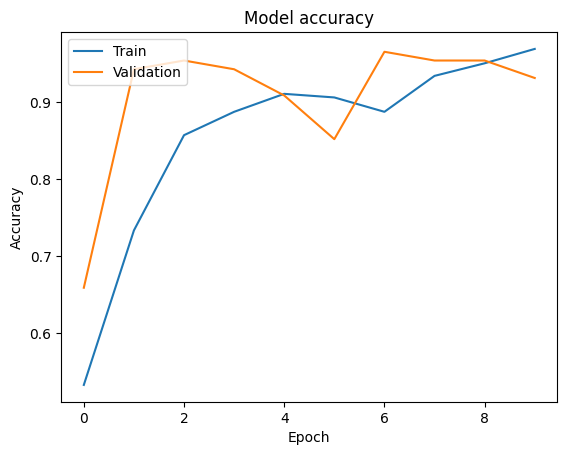

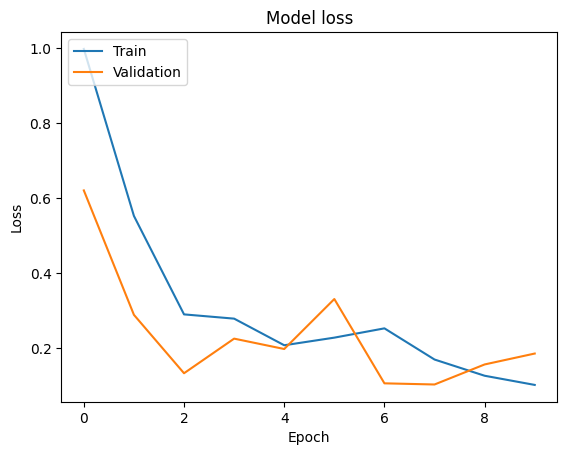

In [5]:
#define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

#compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

# Evaluate the model on the test set
if test_generator.samples > 0:
    evaluation = model.evaluate(test_generator)
    print(f"Test Accuracy: {evaluation[1]*100:.2f}%")
else:
    print("No test samples found.")

# Save the model
model.save('covid19_xray_model.h5')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

The graphs depicts the **Accuracy and Loss** of the model on both the training and validation datasets over a series of 10 epochs.

**Training Accuracy/Loss (blue line):** The accuracy of the model on the training data improves steadily over the epochs, starting from around 0.6 and reaching close to 0.95. This indicates that the model is learning well from the training data. The loss on the training data starts high, around 1.0, and decreases steadily over the epochs, reaching a low of around 0.1. This indicates that the model is learning and improving its performance on the training data.

**Validation Accuracy/Loss (orange line):** The accuracy on the validation data also starts high, rapidly increasing and fluctuating between epochs 2 and 9, before stabilizing slightly below 0.95. The validation loss also starts high and decreases rapidly, with some fluctuations, stabilizing around 0.1. The fluctuations are normal and indicate variability in the validation dataset.

The graph suggests that the model is performing well on both the training and validation datasets, with high accuracy and no significant signs of overfitting or underfitting. The fluctuations in the validation accuracy are normal and can be attributed to variations in the validation data. Overall, both training and validation losses decrease over time, showing that the model is learning effectively. The final low loss values for both training and validation sets suggest that the model has achieved good generalization and is not overfitting.

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 156ms/step


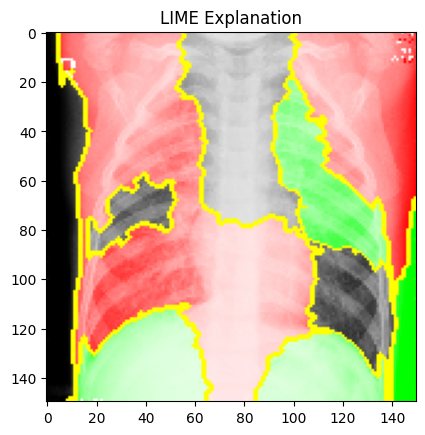

In [6]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Initialize the LIME explainer
explainer = lime_image.LimeImageExplainer()

# Select a sample image from the validation set
sample_image, _ = next(validation_generator)
sample_image = sample_image[0]

# Generate explanation
explanation = explainer.explain_instance(sample_image, model.predict, top_labels=1, hide_color=0, num_samples=1000)

# Display the explanation
temp, mask = explanation.get_image_and_mask(label=0, positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))
plt.title("LIME Explanation")
plt.show()

This **LIME explanation** visualization highlights the regions of a chest X-ray image that are most influential in the model's prediction.

**Red Areas:** Indicate regions that contribute positively to the prediction, meaning these areas strongly support the model's current decision.

**Green Areas:** Represent regions that negatively impact the prediction, meaning these areas oppose the model's decision.

**Yellow Outlines:** These boundaries show the superpixel segmentation used by LIME to divide the image into interpretable chunks.

The visualization helps to understand which parts of the image the model is focusing on to make its predictions, aiding in the interpretability and transparency of the model.

/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

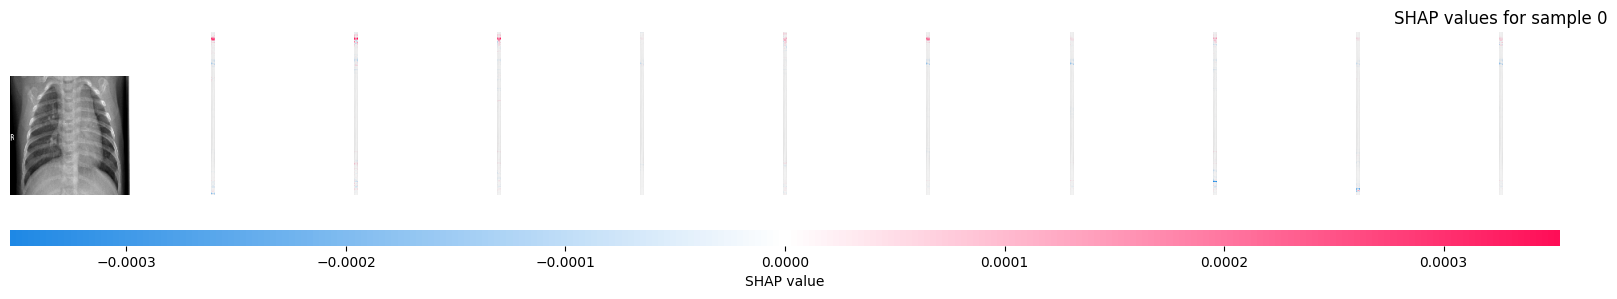

<Figure size 640x480 with 0 Axes>

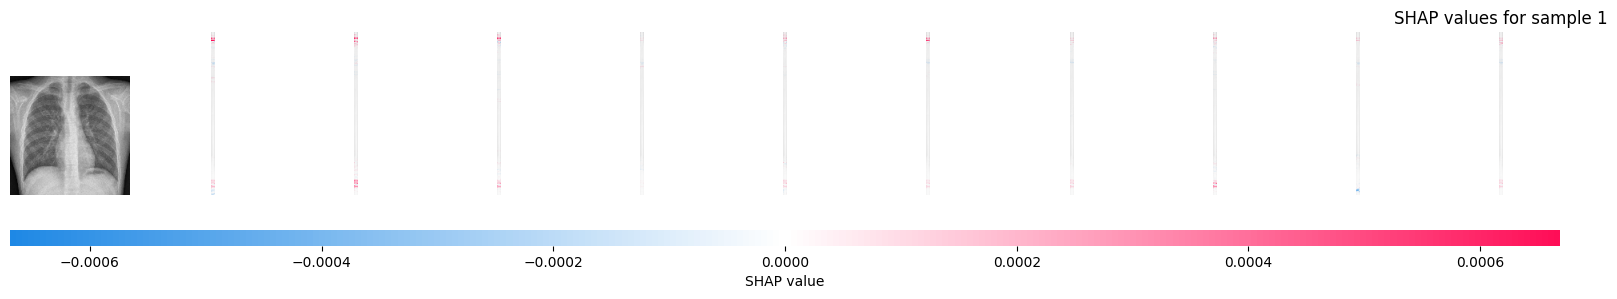

<Figure size 640x480 with 0 Axes>

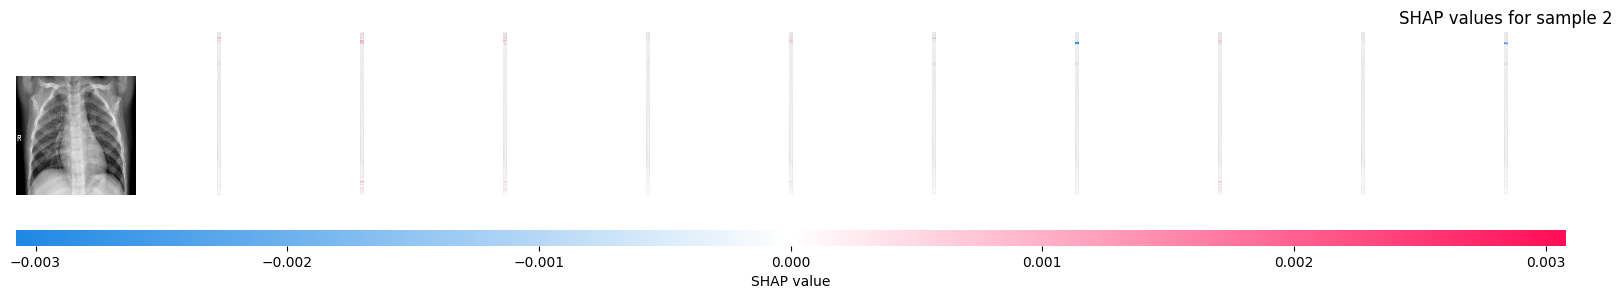

<Figure size 640x480 with 0 Axes>

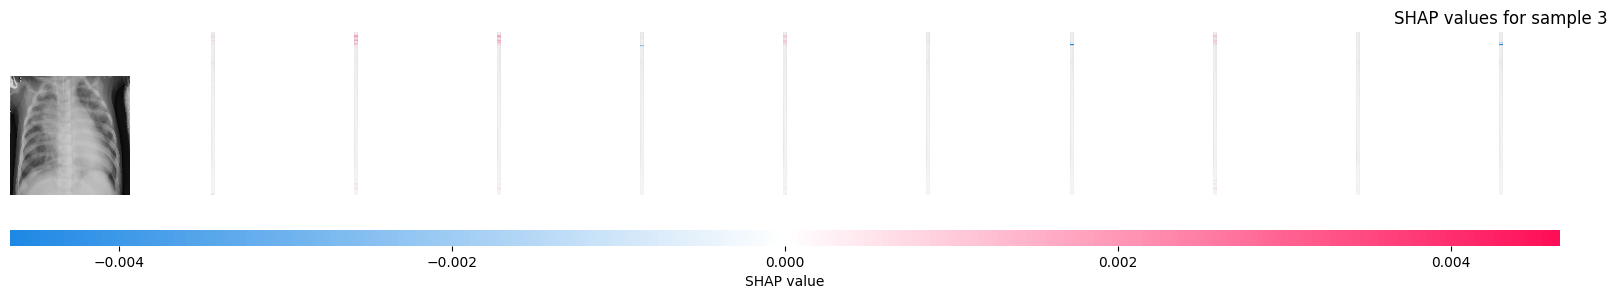

<Figure size 640x480 with 0 Axes>

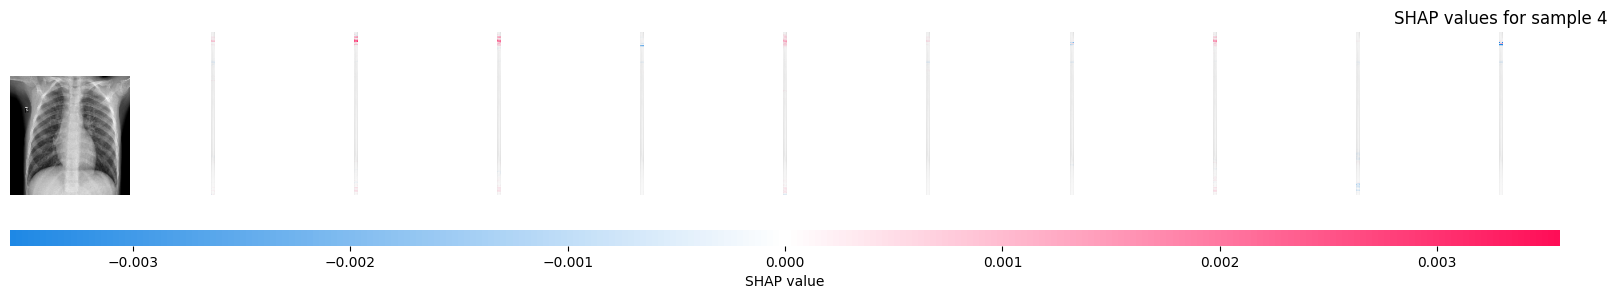

<Figure size 640x480 with 0 Axes>

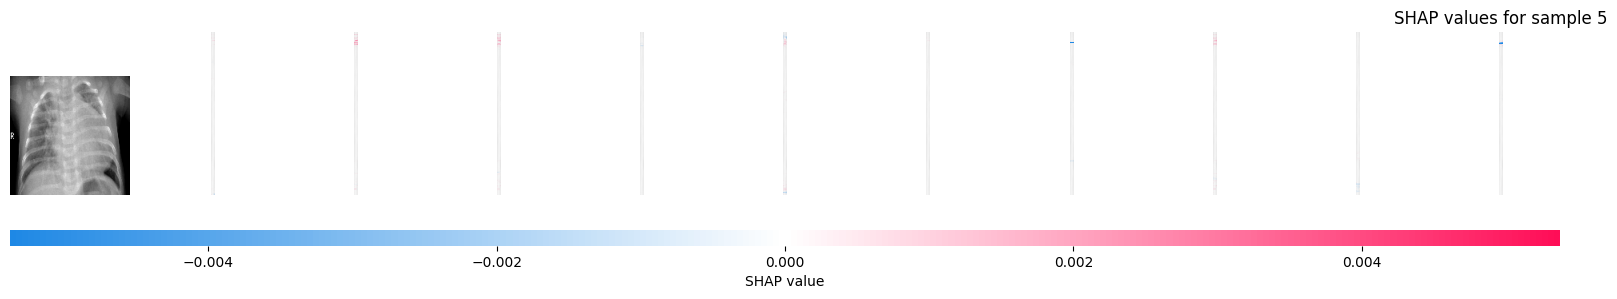

<Figure size 640x480 with 0 Axes>

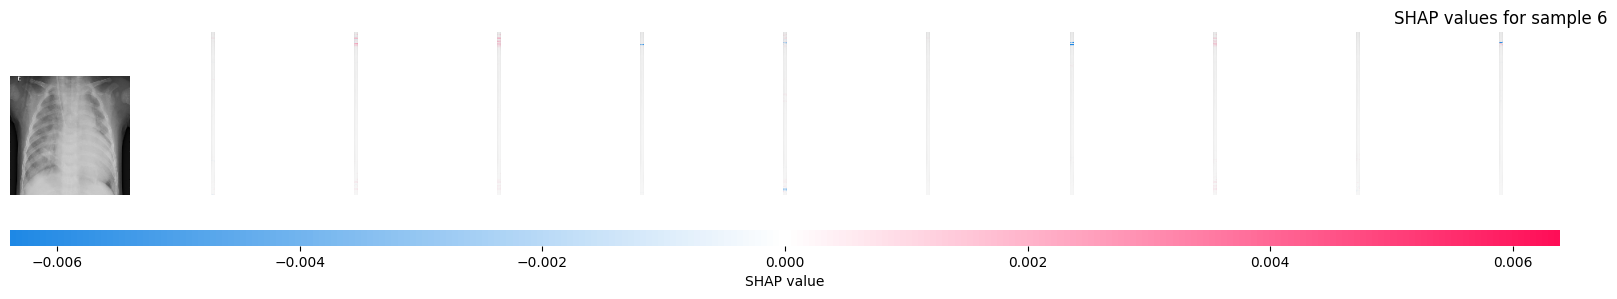

<Figure size 640x480 with 0 Axes>

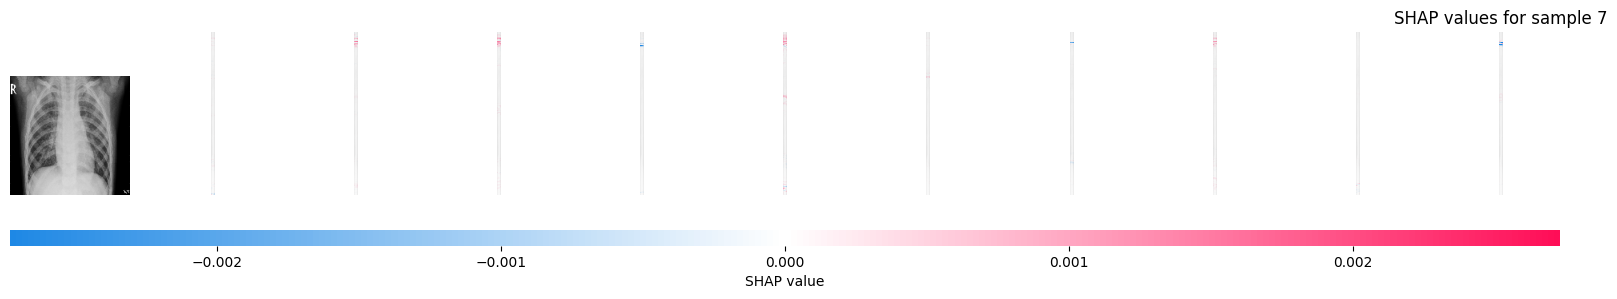

<Figure size 640x480 with 0 Axes>

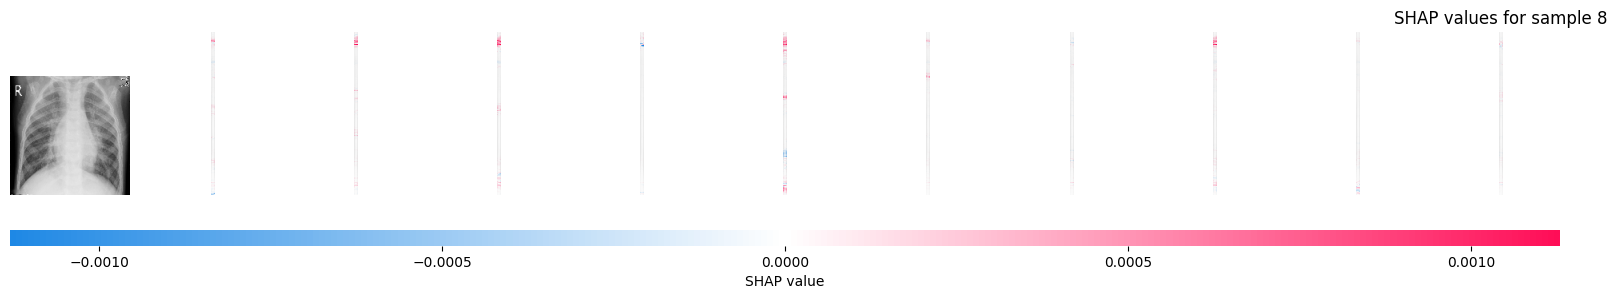

<Figure size 640x480 with 0 Axes>

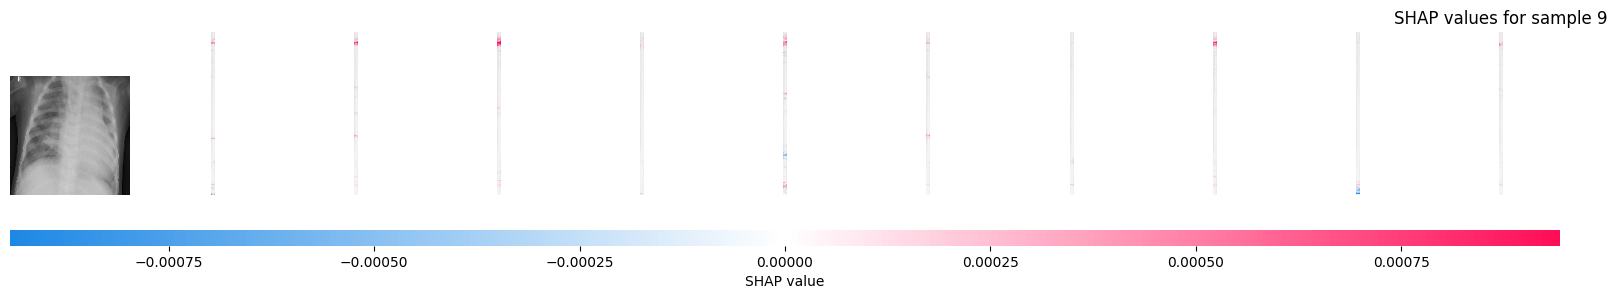

In [7]:
import shap
import matplotlib.pyplot as plt

# Define the background dataset for SHAP
background, _ = next(train_generator)
background = background[:100]

# Create an explainer
explainer = shap.DeepExplainer(model, background)

# Select a sample image from the validation set
sample_images, _ = next(validation_generator)
sample_images = sample_images[:10]

# Compute SHAP values for a sample from the validation set
shap_values = explainer.shap_values(sample_images)

# Plot SHAP values for the first 10 samples in the validation set
for i in range(10):
    plt.figure()
    # Display the original image, not the stacked one
    shap.image_plot([shap_values[j][i] for j in range(len(shap_values))],
                    sample_images[i], # Pass a single image here
                    show=False)
    plt.title(f"SHAP values for sample {i}")
    plt.show()

SHAP values for a sample image, ranging from -0.003 to 0.003, indicating the contribution of each feature to the model's prediction. Features with negative SHAP values (up to -0.003) slightly decrease the model's confidence in its prediction, while those with positive SHAP values (up to 0.003) slightly increase it. The small magnitude of these values suggests a subtle impact by each feature. This visualization helps in understanding which features influence the model's decision and in what direction, thereby enhancing the transparency and interpretability of the AI system.